#  Null Value Computation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [2]:
# set seed for reproducibility
SEED = 20
np.random.seed(SEED)

In [3]:
# Loading Data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('Total zero Glucose values: ' + str(768-df['Glucose'].astype(bool).sum(axis=0)))
print('Total zero BloodPressure values: ' + str(768-df['BloodPressure'].astype(bool).sum(axis=0)))
print('Total zero SkinThickness values: ' + str(768-df['SkinThickness'].astype(bool).sum(axis=0)))
print('Total zero Insulin values: ' + str(768-df['Insulin'].astype(bool).sum(axis=0)))
print('Total zero BMI values: ' + str(768-df['BMI'].astype(bool).sum(axis=0)))
print('Total zero DiabetesPedigreeFunction values: ' + str(768-df['DiabetesPedigreeFunction'].astype(bool).sum(axis=0)))
print('Total zero Age values: ' + str(768-df['Age'].astype(bool).sum(axis=0)))
# These are all 0 values out of 768 in each field.
# We saw outliers during our data viz. Now we need to handle these
# Total zero values in DiabetesPedigreeFunction and Age variable is zero.
# Pregnancy field can be 0.

Total zero Glucose values: 5
Total zero BloodPressure values: 35
Total zero SkinThickness values: 227
Total zero Insulin values: 374
Total zero BMI values: 11
Total zero DiabetesPedigreeFunction values: 0
Total zero Age values: 0


In [5]:
def replace_zero(df):
    df_nan=df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})  
replace_zero(df)

In [6]:
df.isnull().sum()
# We have successfully replaced 0's with Null values
# for colums ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Now we need to handle Nulls somehow
# to find the median for filling null values
# Function outputs median value for mentioned variable based on Outcome var
def replace_zero(df):
    df_nan=df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})
    return df_nan
df_nan=replace_zero(df)

In [8]:
def find_median(df, column_name):
    median_non_diabetic = df[df['Outcome'] == 0][column_name].median()
    median_diabetic = df[df['Outcome'] == 1][column_name].median()
    return median_non_diabetic, median_diabetic

median_non_diabetic, median_diabetic = find_median(df_nan, 'Glucose')
print("Median glucose value for non-diabetic people:", median_non_diabetic)
print("Median glucose value for diabetic people:", median_diabetic)


Median glucose value for non-diabetic people: 107.0
Median glucose value for diabetic people: 140.0


In [9]:
# Function to replace Null values with relevant median values
# returns number of Null values after computation (Should return 0 when called)
def replace_null(frame,var):
    median_df=find_median(frame,var)
    var_0=median_df[var].iloc[0]
    var_1=median_df[var].iloc[1]
    frame.loc[(frame['Outcome'] == 0) & (frame[var].isnull()), var] = var_0
    frame.loc[(frame['Outcome'] == 1) & (frame[var].isnull()), var] = var_1
    return frame[var].isnull().sum()

In [10]:
def replace_null(df, column_name):
    median_value = df[column_name].median()
    df[column_name].fillna(median_value, inplace=True)
    return df[column_name].isnull().sum()

print(f"{replace_null(df_nan,'Glucose')} Nulls for Glucose")
print(f"{replace_null(df_nan,'SkinThickness')} Nulls for SkinThickness")
print(f"{replace_null(df_nan,'Insulin')} Nulls for Insulin")
print(f"{replace_null(df_nan,'BMI')} Nulls for BMI")
print(f"{replace_null(df_nan,'BloodPressure')} Nulls for BloodPressure")


0 Nulls for Glucose
0 Nulls for SkinThickness
0 Nulls for Insulin
0 Nulls for BMI
0 Nulls for BloodPressure


In [11]:
df_nan.isnull().sum()
# Just a confirmation

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


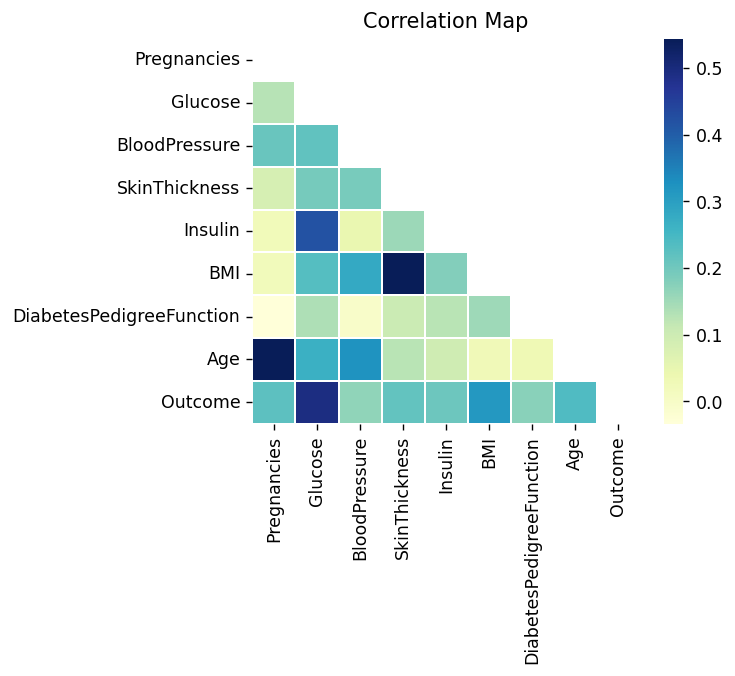

In [12]:
plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df.corr())
#np.triu returns lower triangle for our heatmap as we do not need upper map
sns.heatmap(df_nan.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()
# New Correlation map has higher correlated values